# PRODUCTO GRILLADO PISCO V2p1 estable
___

<img src="img_pisco.png" alt="Girl in a jacket" style="width:700px;height:400px;">

In [1]:
pwd

'M:\\PISCO_clase'

In [2]:
import xarray as xr
import datetime
%matplotlib inline

## Leyendo datos PISCO

In [3]:
# reading from opendap
# http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.monthly/
Piscopm_remote = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.SENAMHI/.HSR/.PISCO/.Prec/.v2p1/.stable/.monthly/.Prec/dods',decode_times=False)
Piscopm_remote

<xarray.Dataset>
Dimensions:  (T: 432, X: 133, Y: 198)
Coordinates:
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
  * Y        (Y) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

### TEST

In [4]:
PISCO_TEST_IRIDL = xr.open_dataset('./data/TEST_v2p1_estable_monthly_iridl.nc',decode_times=False)
PISCO_TEST_IRIDL

<xarray.Dataset>
Dimensions:  (T: 432, X: 133, Y: 198)
Coordinates:
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
  * Y        (Y) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
Data variables:
    Prec     (T, Y, X) float32 ...

In [5]:
PISCO_TEST_WEB = xr.open_dataset('./data/TEST_v2p1_estable_monthly_web.nc', decode_times=False)
PISCO_TEST_WEB

<xarray.Dataset>
Dimensions:    (latitude: 198, longitude: 133, z: 432)
Coordinates:
  * longitude  (longitude) float64 -81.25 -81.15 -81.05 ... -68.25 -68.15 -68.05
  * latitude   (latitude) float64 0.95 0.85 0.75 0.65 ... -18.55 -18.65 -18.75
  * z          (z) float64 0.0 1.0 2.0 3.0 4.0 ... 427.0 428.0 429.0 430.0 431.0
Data variables:
    variable   (z, latitude, longitude) float32 ...
Attributes:
    CDI:          Climate Data Interface version 1.6.2 (http://code.zmaw.de/p...
    Conventions:  CF-1.4
    history:      Thu Apr 12 13:49:43 2018: cdo mergetime /home/senamhi-cesar...
    crs:          +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0...
    crs_format:   PROJ.4
    created_by:   R, packages ncdf4 and raster (version 2.6-7)
    date:         2018-04-12 13:48:52
    CDO:          Climate Data Operators version 1.6.2 (http://code.zmaw.de/p...

### TRABAJANDO CON EL EJEMPLO DE IRIDL

In [6]:
Piscopm = xr.open_dataset('./data/PiscoV2p1_stable_monthly.nc',decode_times=False) # or /
Piscopm

<xarray.Dataset>
Dimensions:  (T: 432, X: 133, Y: 198)
Coordinates:
  * Y        (Y) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
Data variables:
    Prec     (T, Y, X) float32 ...

In [7]:
# Por un demonio! el tiempo
Piscopm.T

<xarray.DataArray 'T' (T: 432)>
array([252.5, 253.5, 254.5, ..., 681.5, 682.5, 683.5], dtype=float32)
Coordinates:
  * T        (T) float32 252.5 253.5 254.5 255.5 ... 680.5 681.5 682.5 683.5
Attributes:
    calendar:       360
    standard_name:  time
    pointwidth:     1.0
    gridtype:       0
    units:          months since 1960-01-01

### Convirtiendo tiempo al tiempo estandar cf

In [8]:
Piscopm.T.attrs['calendar'] = '360_day'
# Ahora le decimos a xarray que interprete los tiempos
Piscopm_cf = xr.decode_cf(Piscopm)
Piscopm_cf

<xarray.Dataset>
Dimensions:  (T: 432, X: 133, Y: 198)
Coordinates:
  * Y        (Y) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * X        (X) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * T        (T) object 1981-01-16 00:00:00 ... 2016-12-16 00:00:00
Data variables:
    Prec     (T, Y, X) float32 ...

### Convirtiendo tiempo cf a formato fecha de datetime para ser leido por pandas

In [9]:
Piscopm_cf['T'] = Piscopm_cf.indexes['T'].shift(-15,'D').to_datetimeindex()
Piscopm_cf['T']

C:\Users\manuel\Anaconda3\envs\pisco\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, '360_day', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  """Entry point for launching an IPython kernel.


<xarray.DataArray 'T' (T: 432)>
array(['1981-01-01T00:00:00.000000000', '1981-02-01T00:00:00.000000000',
       '1981-03-01T00:00:00.000000000', ..., '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * T        (T) datetime64[ns] 1981-01-01 1981-02-01 ... 2016-11-01 2016-12-01

### Renombrando variables al estandar

In [10]:
Piscopm_cf = Piscopm_cf.rename({'X':'lon','Y':'lat','T':'time'})
Piscopm_cf

<xarray.Dataset>
Dimensions:  (lat: 198, lon: 133, time: 432)
Coordinates:
  * lat      (lat) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 2016-12-01
Data variables:
    Prec     (time, lat, lon) float32 ...

## Jugando con los datos Pisco 1981 to 2010

In [11]:
date_clim_ini= datetime.datetime(1981,1,1)
# date_clim_ini= '1981-01-01'
date_clim_fin= datetime.datetime(2010,12,31)
# date_clim_fin= '2010-12-31'

#lat_n= 0.95; lat_s= -18.75; lon_w= -81.25; lon_e= -68.05

#Pisco_clim = Piscopm_cf.Prec.sel(time= slice(date_clim_ini, date_clim_fin).groupby('time.month').mean(dim='time')
Pisco_clim = Piscopm_cf.Prec.sel(time= slice(date_clim_ini.strftime('%Y-%m-%d'), date_clim_fin.strftime('%Y-%m-%d'))).groupby('time.month').mean(dim='time')

C:\Users\manuel\Anaconda3\envs\pisco\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


### Algunas vistas del mes de Enero con xarray 

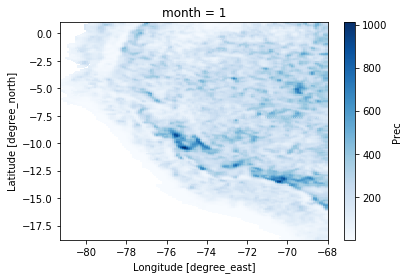

In [12]:
# dando un primera vista a la climatologia del mes de Enero
data = Pisco_clim.sel(month=1)
data.plot(cmap='Blues') #cmap='RdBu'

In [13]:
data

<xarray.DataArray 'Prec' (lat: 198, lon: 133)>
array([[       nan,        nan,        nan, ..., 254.43633 , 186.50539 ,
        181.91478 ],
       [       nan,        nan,        nan, ..., 279.18344 , 218.8042  ,
        212.44199 ],
       [       nan,        nan,        nan, ..., 316.52478 , 265.3937  ,
        242.38524 ],
       ...,
       [       nan,        nan,        nan, ..., 103.56469 , 103.4132  ,
        104.187935],
       [       nan,        nan,        nan, ..., 109.353676, 109.11712 ,
        102.51998 ],
       [       nan,        nan,        nan, ..., 100.39052 ,  92.535904,
         86.249115]], dtype=float32)
Coordinates:
  * lat      (lat) float32 0.95 0.84999996 0.75 0.65 ... -18.55 -18.65 -18.75
  * lon      (lon) float32 -81.25 -81.15 -81.05 -80.95 ... -68.25 -68.15 -68.05
    month    int64 1

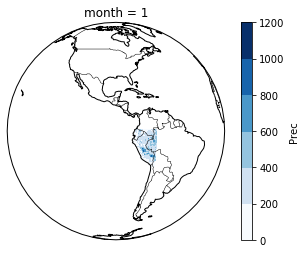

In [14]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeat

#Geostationary(central_longitude=0.0, satellite_height=35785831, false_easting=0, false_northing=0, globe=None, sweep_axis='y')[source]
ax=plt.axes(projection= ccrs.Orthographic(central_longitude=-90))
# ax=plt.axes(projection= ccrs.Geostationary(central_longitude=-80))
data.plot.contourf(ax=ax, transform=ccrs.PlateCarree(), cmap='Blues')
ax.set_global(); ax.coastlines();
ax.add_feature(cfeat.BORDERS, linestyle='-', linewidth=0.5)

### Utilizando clases para el plot

In [32]:
import cartopy.crs as ccrs
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.feature as cfeat
import matplotlib.pyplot as plt
import numpy as np

class Peru_plot:
    def __init__(self,
                 lon,
                 lat,
                 data,
                 proj=ccrs.PlateCarree(central_longitude=180),
                 trans=ccrs.PlateCarree(),
                ):
        self.data = data
        self.lon = lon
        self.lat = lat
        self.proj = proj
        self.trans = trans
        self.setup_canvas()
    
    def format_latlon(self):
        from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

        lon_formatter = LongitudeFormatter()
        lat_formatter = LatitudeFormatter()

        self.ax.set_xticks(np.arange(-180,180,5), crs=ccrs.PlateCarree())
        self.ax.set_yticks(np.arange(-90,90,5), crs=ccrs.PlateCarree())

        self.ax.xaxis.set_major_formatter(lon_formatter)
        self.ax.yaxis.set_major_formatter(lat_formatter)
        
        self.ax.add_feature(cfeat.BORDERS, linestyle='-', linewidth=2.5)
        self.ax.add_feature(cfeat.OCEAN,facecolor='lightblue')

        self.ax.coastlines(color='k', linestyle='-', linewidth=2)
        self.ax.set_extent([-81.5, -68, -18.5, 1 ], crs=ccrs.PlateCarree())
    
    def setup_canvas(self):
        self.fig, self.ax = plt.subplots(figsize=(12,8),subplot_kw={'projection': self.proj})
        
    def set_poligono(self, file_poligono, edgecolor='k'):
        #fname_dep= 'M:\\data_GIS\\dep_peru\\Base_Regional_rep.shp'
        self.shape_feature = ShapelyFeature(Reader(file_poligono).geometries(), ccrs.PlateCarree(), edgecolor='k')
        self.ax.add_feature(self.shape_feature, facecolor='None', linestyle=':', edgecolor= edgecolor, alpha=0.5)
    
    def set_extent(self, *args, glob=False, **kwargs):
        if glob:
            self.ax.set_global()
        else:
            self.ax.set_extent(*args, **kwargs)
        
    def plot(self, add_colorbar=False, **kwargs):
        mesh = self.ax.pcolormesh(self.lon, self.lat, data, transform=self.trans, **kwargs)
        if add_colorbar:
            plt.colorbar(mesh)
        self.ax.gridlines(linestyle='--')


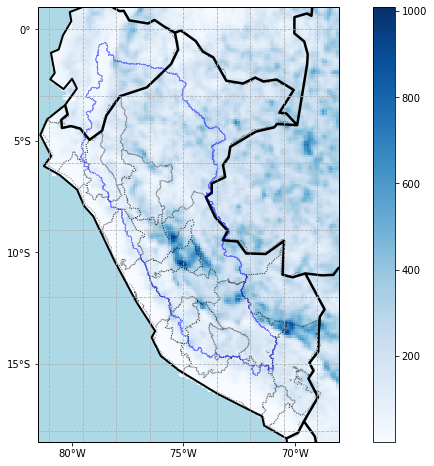

In [35]:
peru_gf = Peru_plot(lon=data.lon, lat=data.lat, data=data)
peru_gf.format_latlon()
#peru_pp.set_extent(glob=True)
# ---------------------------------------------------------------------------------------------------------
# WGS 84 / UTM zone 18S (EPSG:32718) to WGS 84 (EPSG:4326)
peru_gf.set_poligono('./data/shps/Base_Regional_rep.shp')
peru_gf.set_poligono('./data/shps/Tamshiyacu_Amazonas.shp', edgecolor='b')
# ---------------------------------------------------------------------------------------------------------
peru_gf.plot(cmap='Blues', add_colorbar=True)#,vmin=-0, vmax=1200, alpha=0.5)
# peru_gf.plot(cmap='Blues')

### Climatologia

#### Xarray

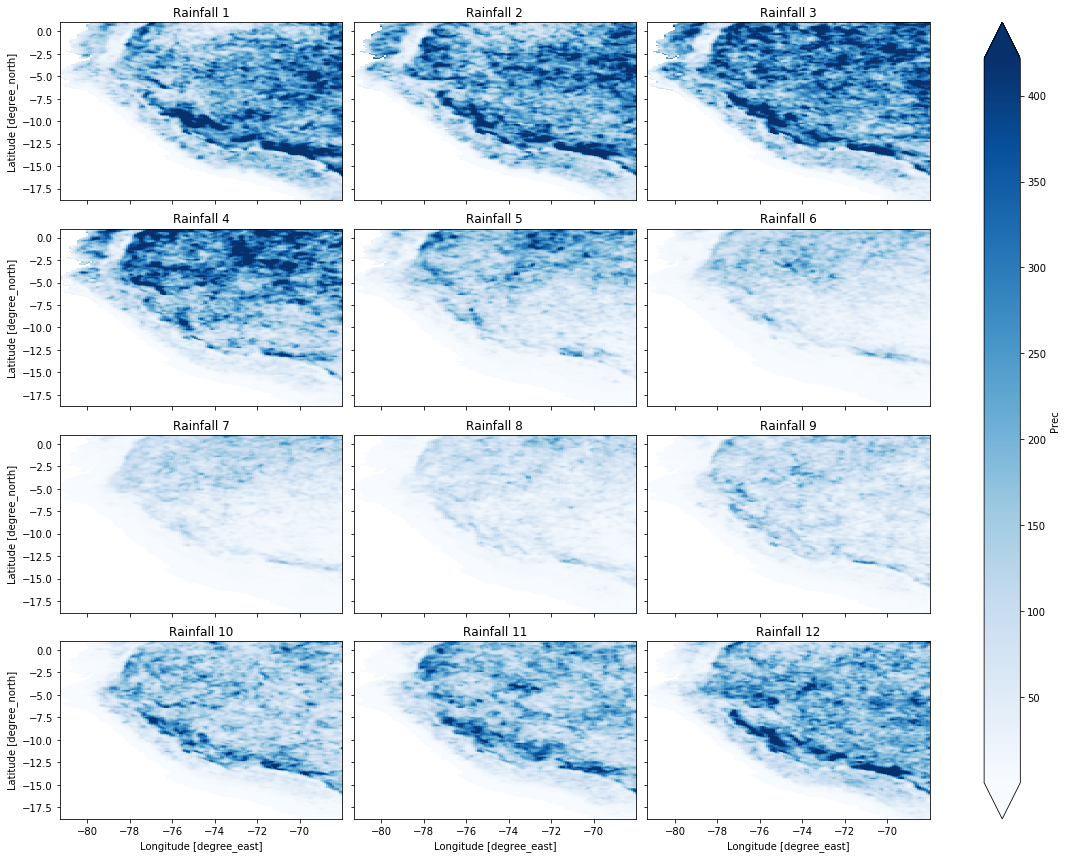

In [17]:
g = Pisco_clim.plot.imshow('lon', 'lat', col='month', col_wrap=3, robust=True, figsize=(16,12), cmap='Blues')

for i, ax in enumerate(g.axes.flat):
    ax.set_title('Rainfall %d' %(i+1))

#### Una mezcla de todo

Text(0.99, 0.18, 'Clim 1981-2010')

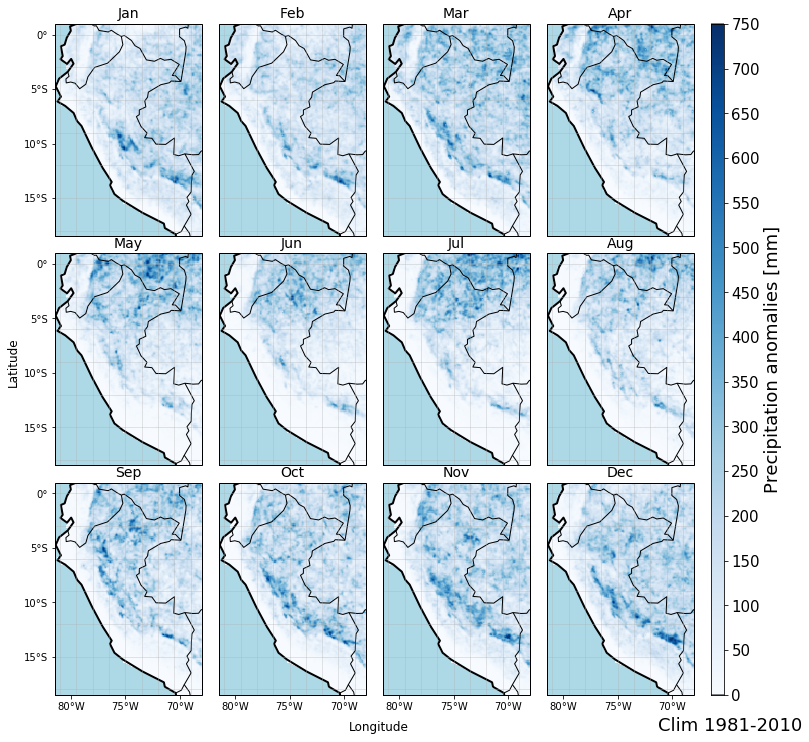

In [18]:
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeat
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.mpl.geoaxes import GeoAxes
from mpl_toolkits.axes_grid1 import AxesGrid

titles = pd.date_range('2014-01-01','2014-12-31', freq='M').strftime("%b").tolist() 

axes_class = (GeoAxes,dict(map_projection=ccrs.PlateCarree()))

x_figsize, y_figsize = 12, 16
fig = plt.figure(figsize=(x_figsize, y_figsize))

axgr = AxesGrid(fig, 111, axes_class=axes_class,
                    #rect=[left, bottom, width, height] 
                    nrows_ncols=(3,4),                                      ## ndias
                    axes_pad=0.24,
                    # espaciado entre todos los graf
                    cbar_location='right',
                    cbar_mode='single',
                    cbar_pad=None,
                    # separacion de la bar de los demas graficos
                    cbar_size='3%',
                    # grosor de la bar
                    label_mode=''
                    ) 

for i, ax in enumerate(axgr):
    ax.set_title(str(titles[i]), fontsize= 14)
    
    if (i == 0 or i == 4 or i == 8):                                 ## ndias
        ax.set_yticks([-90, -60, -30, -20, -15, -10, -5, 0, 5, 10, 15, 20, 30, 60, 90], minor=False, crs=ccrs.PlateCarree())
        #ax.yticks.set_fontsize(fontsize=14)
        
    if (i == 8 or i == 9 or i == 10 or i == 11):                                         ##ndias
        ax.set_xticks([-180, -90, -80, -75, -70, -60, -40, -30, 0, 30, 60, 90,180], crs=ccrs.PlateCarree())

    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    
    ax.add_feature(cfeat.BORDERS, linestyle='-', linewidth=1)
    ax.add_feature(cfeat.OCEAN,facecolor='lightblue')

    ax.coastlines(color='k', linestyle='-', linewidth=2)
    ax.set_extent([-81.5, -68, -18.5, 1 ], crs=ccrs.PlateCarree())
    ax.gridlines(linestyle='-', alpha=0.4)
    im= Pisco_clim.sel(month= i+1).plot(ax=axgr[i], transform=ccrs.PlateCarree(), add_colorbar=False, add_labels=False, cmap='Blues')
    
cbar = ax.cax.colorbar(im)
cbar = axgr.cbar_axes[0].colorbar(im)
#cbar = axgr.cbar_axes[10].colorbar(im)
cbar.ax.set_yticks(np.arange(0, 800, 50))#[-20, -10, -2.75, 0, 2.75, 10, 20] #np.arange(-20, 20.01, 4))
cbar.ax.set_yticklabels(np.arange(0, 800, 50), fontsize= 15) # '-+ \u03C3' # '-+ 2.75'
var = axgr.cbar_axes[0]
#var = axgr.cbar_axes[0]
axis = var.axis[var.orientation]
axis.label.set_fontsize(18) 
axis.label.set_text("Precipitation anomalies [mm]")


fig.text(0.5, 0.18 , 'Longitude', ha='center', fontsize=12, transform=fig.transFigure) #fontsize=12
fig.text(0.07, 0.5, 'Latitude', va='center', fontsize=12, rotation='vertical', transform=fig.transFigure)
ax.text(0.99, 0.18, "Clim 1981-2010", fontsize=18, horizontalalignment='right', transform=fig.transFigure)

# MODULO SALEM
---

In [19]:
# WGS 84 / UTM zone 18S (EPSG:32718) to WGS 84 (EPSG:4326)

In [20]:
import salem # instalar salem, geopandas y rasterio

## Proyección personalizada
Alternativamente, Salem comprenderá cualquier proyección compatible con pyproj . [buscar proyeccion](https://spatialreference.org/ref/epsg/4326/)

La información del proyecto debe proporcionarse como atributo:

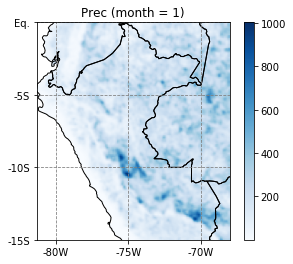

In [21]:
dsx= Pisco_clim.sel(month=1)
psrs = 'epsg:4326' #32718 3448
dsx.attrs['pyproj_srs'] = psrs
#dsx.set_data(dsx['Prec'])
dsx.salem.quick_map(interp='linear', cmap='Blues');

## Subssetting data 
La subset() función le permite subconjuntar sus conjuntos de datos de acuerdo con datos vectoriales o ráster (georreferenciados), por ejemplo, basados en geometrías bien formadas (por ejemplo, polígonos), otras cuadrículas o archivos de formas:

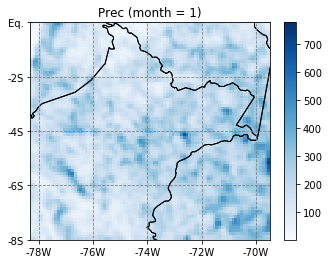

In [22]:
# M:\\data_GIS\\dep_peru\\Base_Regional_rep.shp
shdf = salem.read_shapefile('./data/shps/Base_Regional_rep.shp')
shdf = shdf.loc[shdf['NOMBDEP'] == 'LORETO']  # remove other deps
Pisco_clim2 = Pisco_clim.salem.subset(shape=shdf, margin=5) # add or delete pixeles a los limites
#I am densified (external_values, 1 elements)
Pisco_clim2.sel(month=1).salem.quick_map(cmap= 'Blues')

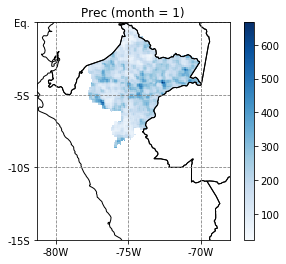

In [23]:
# shdf = salem.read_shapefile('M:\\data_GIS\\dep_peru\\Loreto.shp')
# M:\\data_GIS\\shps_amazonbasin\\Tamshiyacu_Amazonas.shp
Pisco_clim3_corte = Pisco_clim.salem.roi(shape=shdf)
#I am densified (external_values, 1 elements)
Pisco_clim3_image= Pisco_clim3_corte.sel(month=1).salem.quick_map(cmap= 'Blues')
#Pisco_clim3_corte.sel(month=1)

# revisar si usar o no

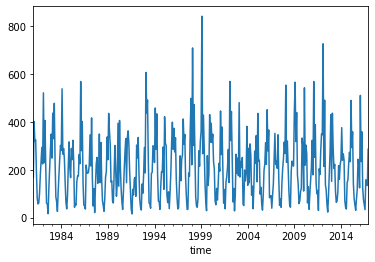

In [24]:
# -77.45028	-4.45028
Pisco_Borja= Piscopm_cf.sel(lon=-77.45028, method='nearest').sel(lat=-4.45028, method='nearest')#.sel(time= slice('2011-01-01',  '2014-12-31'))
df_pp_pisco= Pisco_Borja.to_dataframe()
df_pp_pisco.Prec.plot()

## Prom areal

In [25]:
#A AREA DE ESTUDIO
lat_n= -1; lat_s= -6; lon_w= -79; lon_e= -75

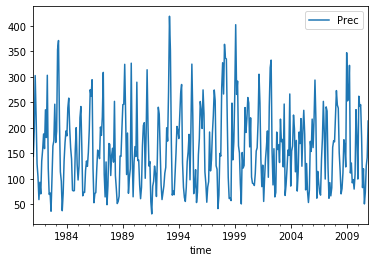

In [26]:
Piscopm_cf_ta= Piscopm_cf.sel(time= slice(date_clim_ini.strftime('%Y-%m-%d'), date_clim_fin.strftime('%Y-%m-%d')), lon=slice(lon_w, lon_e), lat=slice(lat_n, lat_s))
pp_pisco= Piscopm_cf_ta.Prec.mean(dim=('lat','lon'))
df_pp_pisco= pp_pisco.to_dataframe()
df_pp_pisco.plot()